In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dog.csv'  # Update this with the correct file path
dog_data = pd.read_csv(file_path)

# Drop the 'ID' column
dog_data = dog_data.drop(columns=['ID'])

# One-hot encode categorical variables
dog_data_encoded = pd.get_dummies(dog_data, columns=['Gender', 'Position'], drop_first=True)

# Separate features and target variable
X = dog_data_encoded.drop(columns=['Salary'])
y = dog_data_encoded['Salary']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Plotting the predicted vs actual salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()


Data Preprocessing: The categorical variables (Gender, Position) are converted into numerical values using one-hot encoding.
Model Training: The linear regression model is trained on 80% of the data and tested on the remaining 20%.
Model Evaluation: The model's performance is evaluated using MSE, RMSE, and R².
Visualization: A scatter plot is created to visualize the actual vs. predicted salaries.
Replace 'dog.csv' with the actual path to your dataset when running the code locally.

In [6]:
data=pd.read_csv("C:\\Users\\ssure\\OneDrive\\Desktop\\all python\\datasets\\dog.csv")
data

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996


In [7]:
data.head

<bound method NDFrame.head of       ID Gender  Experience (Years)                      Position  Salary
0      1      F                   4               DevOps Engineer  109976
1      2      M                   6               DevOps Engineer  120088
2      3      M                  17                 Web Developer  181301
3      4      M                   7         Systems Administrator   77530
4      5      F                  13         Systems Administrator  152397
..   ...    ...                 ...                           ...     ...
395  396      F                  19     Cloud Solutions Architect  236045
396  397      F                  20                 Web Developer  182770
397  398      F                   9         Network Administrator   85550
398  399      M                  18  Database Administrator (DBA)  129996
399  400      F                  11           IT Security Analyst  169058

[400 rows x 5 columns]>

In [8]:
data.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [9]:
data.info

<bound method DataFrame.info of       ID Gender  Experience (Years)                      Position  Salary
0      1      F                   4               DevOps Engineer  109976
1      2      M                   6               DevOps Engineer  120088
2      3      M                  17                 Web Developer  181301
3      4      M                   7         Systems Administrator   77530
4      5      F                  13         Systems Administrator  152397
..   ...    ...                 ...                           ...     ...
395  396      F                  19     Cloud Solutions Architect  236045
396  397      F                  20                 Web Developer  182770
397  398      F                   9         Network Administrator   85550
398  399      M                  18  Database Administrator (DBA)  129996
399  400      F                  11           IT Security Analyst  169058

[400 rows x 5 columns]>

In [10]:
data.describe()

,ID,Experience (Years),Salary
count,400.000000,400.000000,400.00000
mean,200.500000,9.670000,131701.19750
std,115.614301,6.101571,43351.50899
min,1.000000,0.000000,43643.00000
25%,100.750000,4.000000,100484.75000
50%,200.500000,10.000000,128561.50000
75%,300.250000,15.000000,157735.00000
max,400.000000,20.000000,269950.00000


In [11]:
data=data.drop(columns='ID')


In [12]:
dog_data_encoded = pd.get_dummies(data, columns=['Gender', 'Position'], drop_first=True)
dog_data_encoded

,Experience (Years),Salary,Gender_M,Position_Database Administrator (DBA),Position_DevOps Engineer,Position_IT Manager,Position_IT Security Analyst,Position_IT Support Specialist,Position_Network Administrator,Position_Software Engineer,Position_Systems Administrator,Position_Systems Analyst,Position_Web Developer
0,4,109976,False,False,True,False,False,False,False,False,False,False,False
1,6,120088,True,False,True,False,False,False,False,False,False,False,False
2,17,181301,True,False,False,False,False,False,False,False,False,False,True
3,7,77530,True,False,False,False,False,False,False,False,True,False,False
4,13,152397,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19,236045,False,False,False,False,False,False,False,False,False,False,False
396,20,182770,False,False,False,False,False,False,False,False,False,False,True
397,9,85550,False,False,False,False,False,False,True,False,False,False,False
398,18,129996,True,True,False,False,False,False,False,False,False,False,False


In [13]:
X = dog_data_encoded.drop(columns=['Salary'])
y = dog_data_encoded['Salary']


In [14]:
X

,Experience (Years),Gender_M,Position_Database Administrator (DBA),Position_DevOps Engineer,Position_IT Manager,Position_IT Security Analyst,Position_IT Support Specialist,Position_Network Administrator,Position_Software Engineer,Position_Systems Administrator,Position_Systems Analyst,Position_Web Developer
0,4,False,False,True,False,False,False,False,False,False,False,False
1,6,True,False,True,False,False,False,False,False,False,False,False
2,17,True,False,False,False,False,False,False,False,False,False,True
3,7,True,False,False,False,False,False,False,False,True,False,False
4,13,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,19,False,False,False,False,False,False,False,False,False,False,False
396,20,False,False,False,False,False,False,False,False,False,False,True
397,9,False,False,False,False,False,False,True,False,False,False,False
398,18,True,True,False,False,False,False,False,False,False,False,False


In [15]:
y

0      109976
1      120088
2      181301
3       77530
4      152397
        ...  
395    236045
396    182770
397     85550
398    129996
399    169058
Name: Salary, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.10,random_state=0)


In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
modal=LinearRegression()

In [19]:
modal.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=modal.predict(x_test)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)



In [22]:
mae=mean_absolute_error(y_test,y_pred)

In [23]:
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Root Mean absulute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 657698114.0665683
Root Mean Squared Error (RMSE): 25645.625632192485
Root Mean absulute Error (MAE): 22762.326092654635
R-squared (R²): 0.6542801782310308


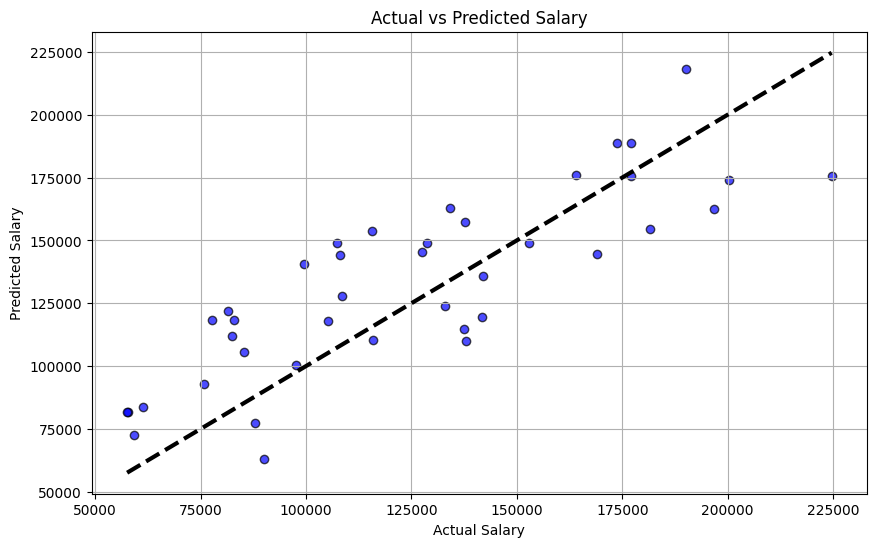

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dog.csv'  # Update this with the correct file path
dog_data = pd.read_csv(file_path)

# Drop the 'ID' column
dog_data = dog_data.drop(columns=['ID'])

# One-hot encode categorical variables
dog_data_encoded = pd.get_dummies(dog_data, columns=['Gender', 'Position'], drop_first=True)

# Separate features and target variable
X = dog_data_encoded.drop(columns=['Salary'])
y = dog_data_encoded['Salary']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Plotting the predicted vs actual salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()
